In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/tansy/Ai/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

# 데이터 전처리 

## Sex 칼럼 문자 => 라벨 인코딩

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Sex'].value_counts().sort_index()

Sex
0    1307
1    1342
2    1528
Name: count, dtype: int64

## 레이블(Rings) 데이터 확인

Text(0.5, 1.0, 'Label')

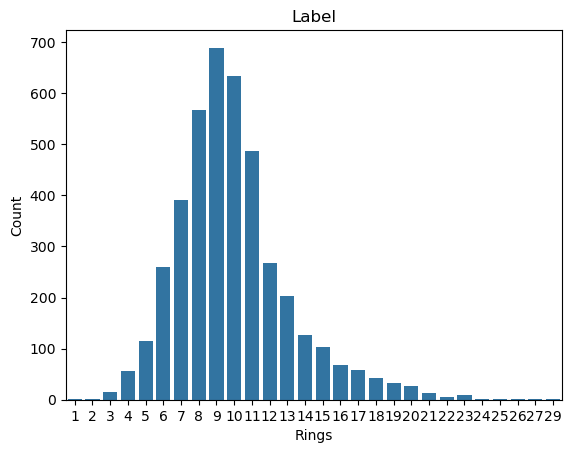

In [5]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings") 
plt.ylabel("Count")
plt.title("Label") 

In [7]:
df['Rings'].value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

## 레이블 범주화하기

In [8]:
import pandas as pd

df_c = df

bins = [0,5,10,30]  # 구간 설정
labels = [0,1,2]
df_c['Rings'] = pd.cut(df_c['Rings'], bins=bins, labels=labels).astype(int)

In [9]:
df['Rings'].value_counts().sort_index()

Rings
0     189
1    2541
2    1447
Name: count, dtype: int64

# 결측치 확인 및 제거

In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [12]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

## 컬럼별 상관관계 분석

C:\Users\tansy\AppData\Local\Temp\ipykernel_19552\942097290.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
C:\Users\tansy\AppData\Local\Temp\ipykernel_19552\942097290.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Diameter'],

<Axes: xlabel='Diameter', ylabel='Density'>

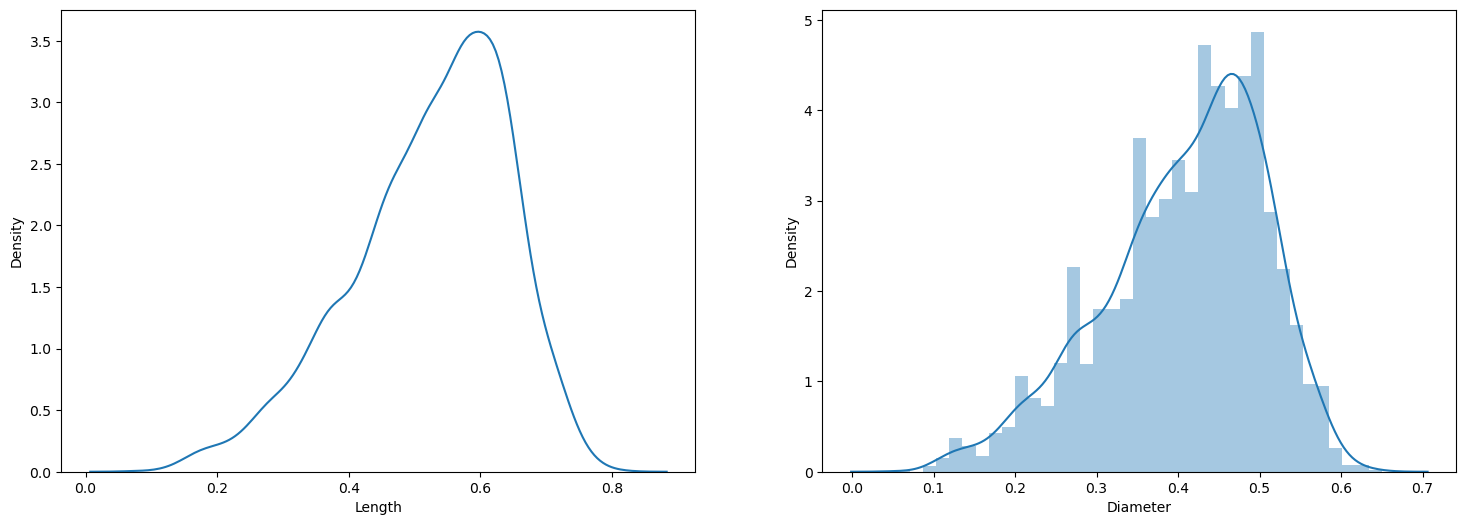

In [13]:
# 컬럼별 히스토그램 확인
# 'mean radius'와'mean texture' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Diameter'], ax=ax2)

## 두 변수 간 산점도 

Text(0, 0.5, 'Diameter')

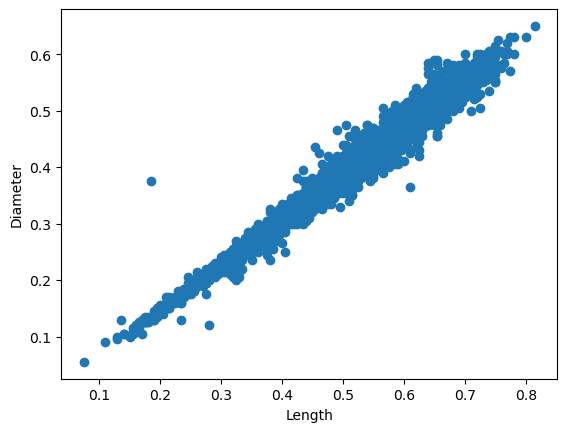

In [14]:

plt.scatter(df['Length'], df['Diameter'])
plt.xlabel('Length')
plt.ylabel('Diameter')

## pairplot을 이용해 여러 컬럼 간 상관관계 살펴보기 

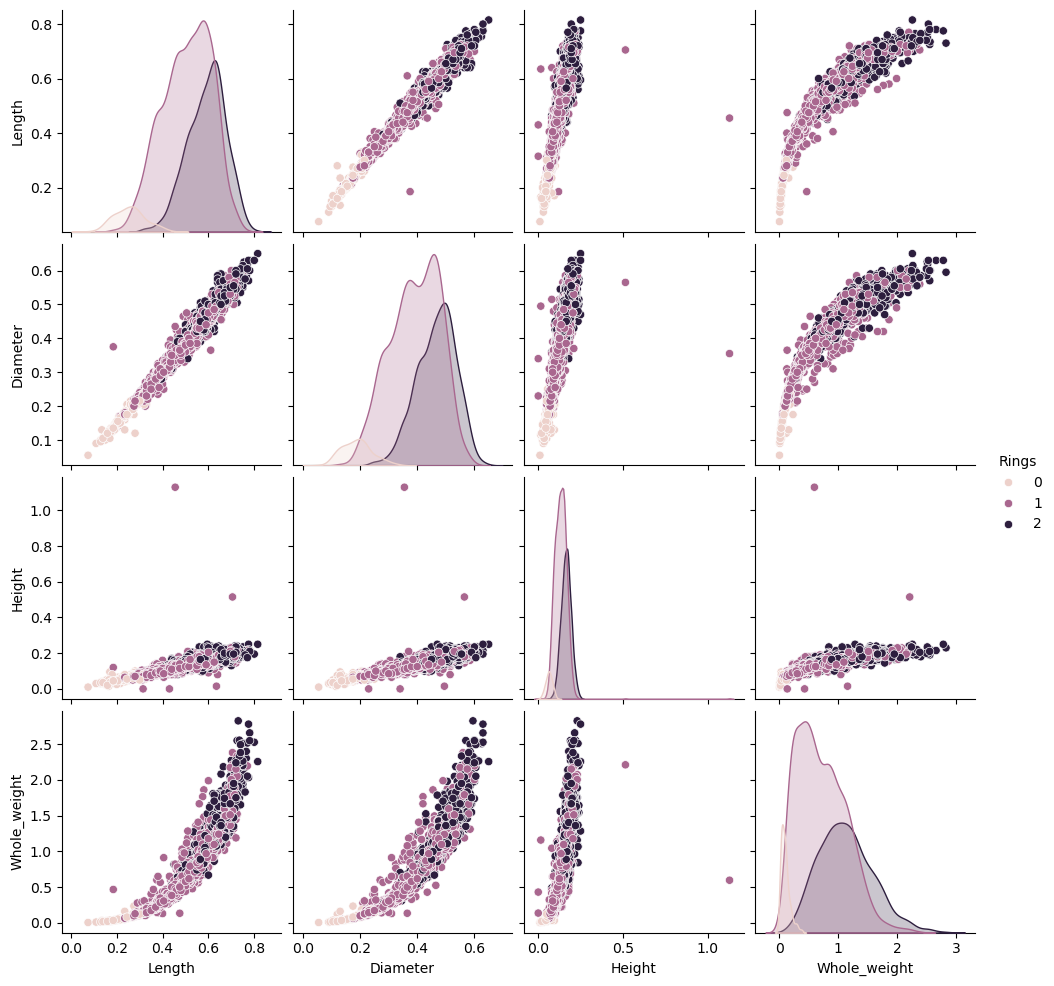

In [16]:
sns.pairplot(df, vars=['Length', 'Diameter', 'Height', 'Whole_weight'], hue='Rings') 
plt.show()

# boxPlot을 통한 특정 칼럼의 범위 확인 및 outlier 확인 

C:\Users\tansy\AppData\Local\Temp\ipykernel_19552\3447035969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diameter", data=df, palette="Set3")


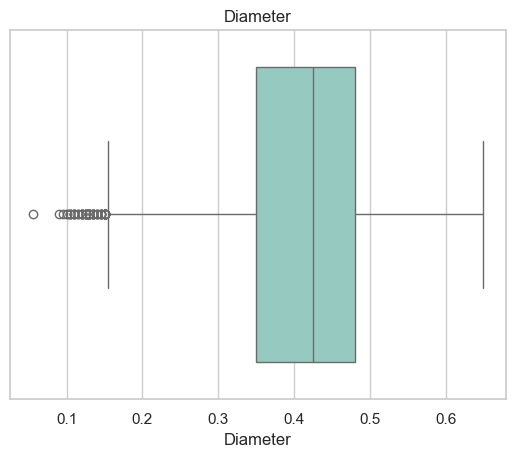

In [17]:

sns.set_theme(style="whitegrid")
sns.boxplot(x="Diameter", data=df, palette="Set3")
plt.title("Diameter")
plt.show()

# 각 컬럼별 히스토그램 확인 

C:\Users\tansy\AppData\Local\Temp\ipykernel_19552\3258718182.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


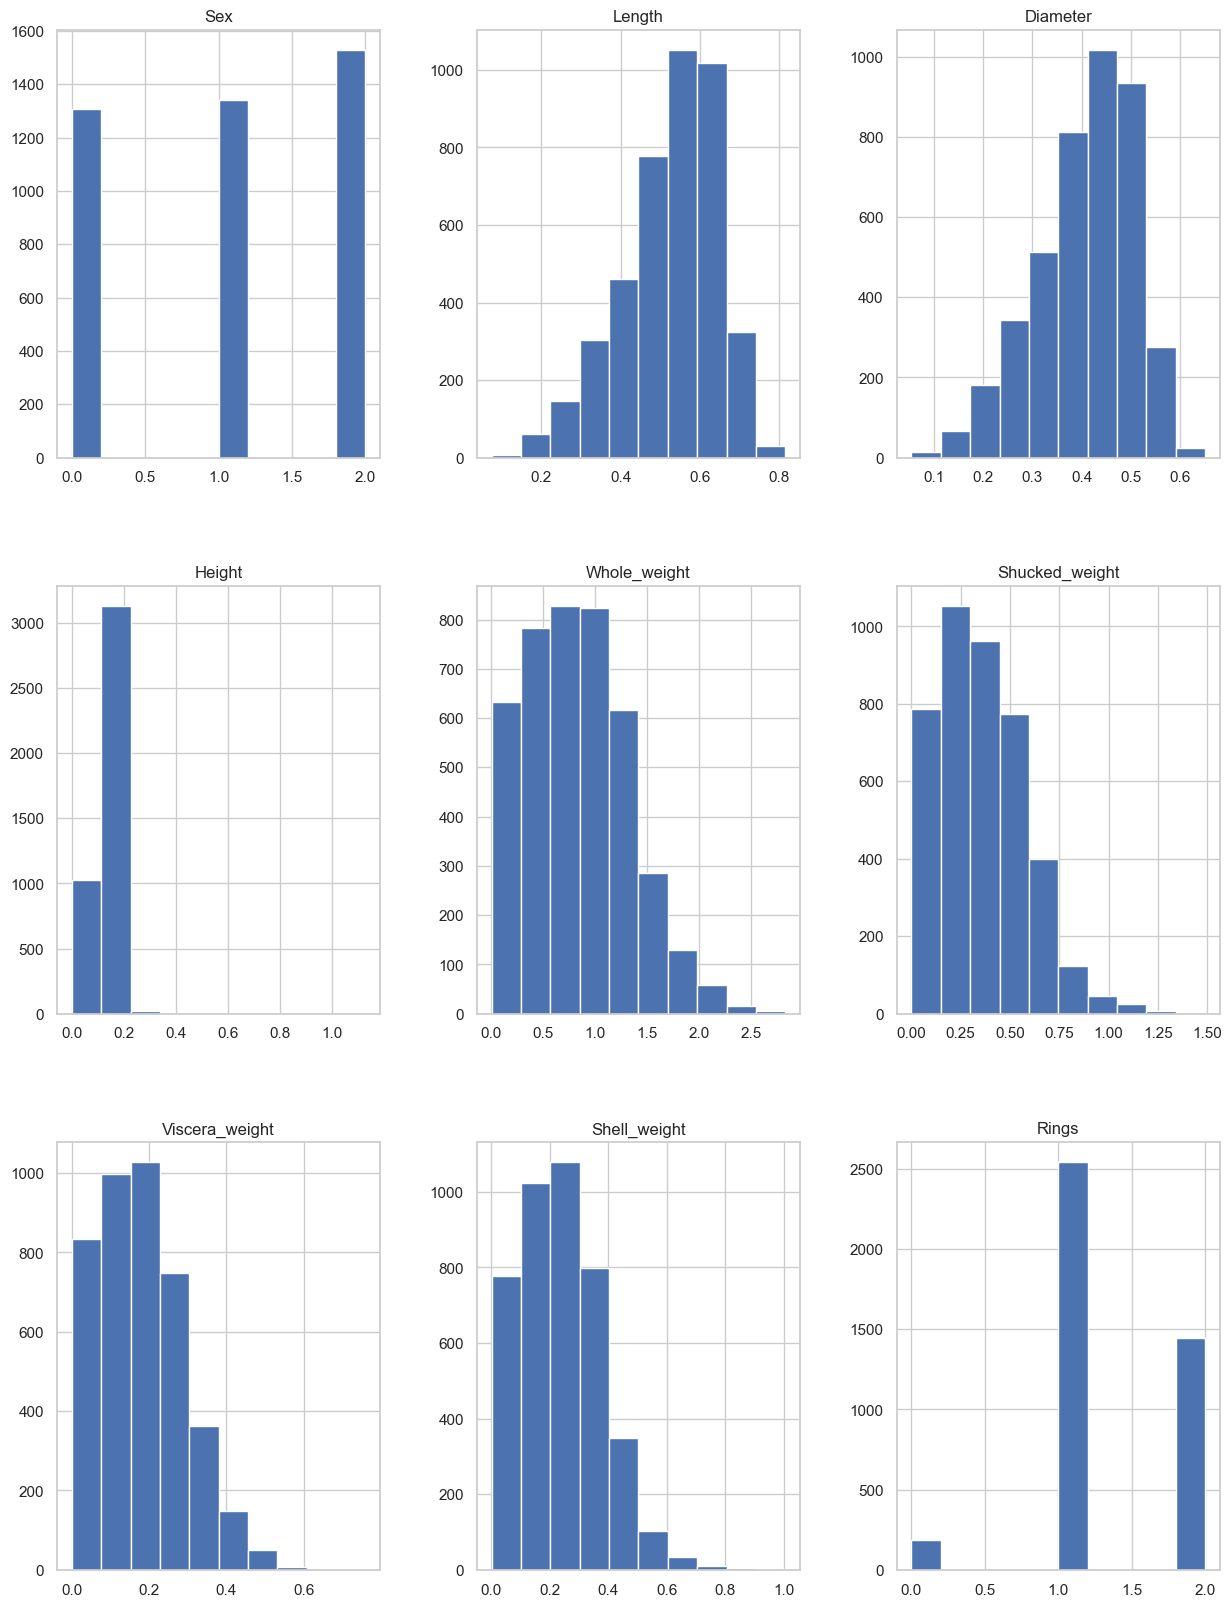

In [18]:
fig = plt.figure(figsize = (15,20)) 
ax = fig.gca() 
df.hist(ax = ax) 
plt.show() 

# 1. 훈련 데이터 준비

In [30]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [22]:
y = df['Rings']
y.value_counts()

Rings
1    2541
2    1447
0     189
Name: count, dtype: int64

# 원 핫 인코딩

In [23]:
y = pd.get_dummies(y).values
y

array([[False, False,  True],
       [False,  True, False],
       [False,  True, False],
       ...,
       [False,  True, False],
       [False,  True, False],
       [False, False,  True]])

# 딥러닝 입력을 위해 X를 Numpy로 변환

In [31]:
X = X.values
X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [33]:
X.shape, y.shape

((4177, 8), (4177, 3))

# 입력, 출력 차원 분석 

In [35]:
input_dim, output = X.shape[1], y.shape[1] #특징 개수, 분류 클래스 개수 
input_dim, output

(8, 3)

# 2. 모델 구축

In [36]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential() 

model.add(Dense(10, input_shape= (input_dim,), activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(output, activation='softmax'))

model.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy']) # 정확도 지표 accuracy(분류) <=> mse(회귀) 

model.summary()

C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 253 (1012.00 B)

 Non-trainable params: 0 (0.00 B)

# 3. 훈련

In [37]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)  #다중 분류 문제에서 원 - 핫 인코딩 => 숫자로 바꾸는 방법임 
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6154 - loss: 0.8395 - val_accuracy: 0.6184 - val_loss: 0.7585
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6346 - loss: 0.7113 - val_accuracy: 0.6459 - val_loss: 0.6927
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6708 - loss: 0.6529 - val_accuracy: 0.6639 - val_loss: 0.6509
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6687 - loss: 0.6303 - val_accuracy: 0.6842 - val_loss: 0.6289
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6913 - loss: 0.6033 - val_accuracy: 0.6974 - val_loss: 0.6116
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6983 - loss: 0.5979 - val_accuracy: 0.6914 - val_loss: 0.6043
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6920 - loss: 0.5842 - val_accuracy: 0.6962 - val_loss: 0.5943
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7044 - loss: 0.5740 - val_accuracy: 0.

## 4. 모델 평가( 분류는 혼동 행렬, 회귀는 산점도로 모델 평가)

## (1) epoch 당 loss값 비교

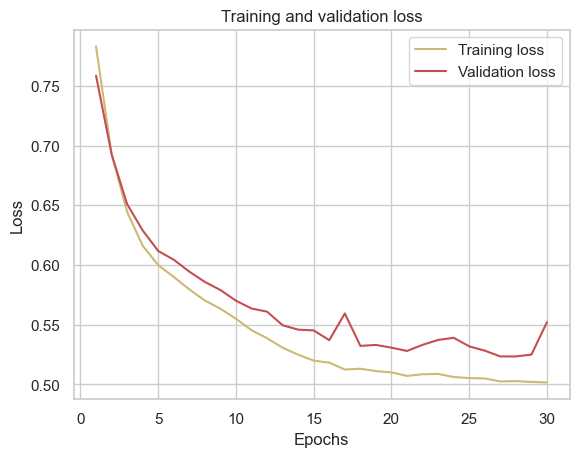

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## (2) epoch 당 정확도 비교 

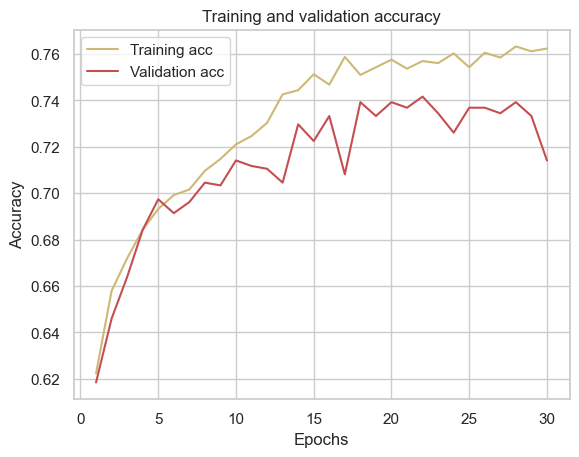

In [39]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# classification_report 및 혼동 행렬로 모델 평가

In [44]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix

# 이진 분류 모델의 성능 평가 
# precision(클래스별 정확도), recall,f1-score(재현율, 균형), support(샘플 개수) 
print(classification_report(y_test_class,y_pred_class))


print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66        49
           1       0.70      0.89      0.79       492
           2       0.77      0.43      0.55       295

    accuracy                           0.71       836
   macro avg       0.72      0.65      0.67       836
weighted avg       0.72      0.71      0.70       836

[[ 31  18   0]
 [ 14 440  38]
 [  0 169 126]]
